In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_movie=pd.read_csv('https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/bootcamp/recommender_system/movies_metadata.csv')

C:\Users\Kamlesh\AppData\Local\Temp\ipykernel_7864\2922558936.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movie=pd.read_csv('https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/bootcamp/recommender_system/movies_metadata.csv')


In [3]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
df_movie.dropna(inplace=True)

In [5]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 9 to 45029
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  693 non-null    object 
 1   belongs_to_collection  693 non-null    object 
 2   budget                 693 non-null    object 
 3   genres                 693 non-null    object 
 4   homepage               693 non-null    object 
 5   id                     693 non-null    object 
 6   imdb_id                693 non-null    object 
 7   original_language      693 non-null    object 
 8   original_title         693 non-null    object 
 9   overview               693 non-null    object 
 10  popularity             693 non-null    object 
 11  poster_path            693 non-null    object 
 12  production_companies   693 non-null    object 
 13  production_countries   693 non-null    object 
 14  release_date           693 non-null    object 
 15  reve

In [6]:
df_movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
68,False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,...,1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0
69,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,...,1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0
153,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,"[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",...,1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0
178,False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.powerrangers.com/,9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,...,1995-06-30,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0


In [7]:
v=df_movie['vote_count']
R=df_movie['vote_average']
C=df_movie['vote_average'].mean()
m=df_movie['vote_count'].quantile(0.70)

In [8]:
df_movie['weighted_moving_avg']=((R*v)+(C*m))/(v+m)

In [9]:
df_movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,weighted_moving_avg
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,6.394964
68,False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,...,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0,6.421321
69,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,...,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0,6.556749
153,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,"[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",...,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0,6.278391
178,False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.powerrangers.com/,9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,...,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0,6.193985


In [10]:
movie_sorted_ranking=df_movie.sort_values('weighted_moving_avg',ascending=False)
movie_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_moving_avg', 'popularity']].head(10)

,original_title,vote_count,vote_average,weighted_moving_avg,popularity
12481,The Dark Knight,12269.0,8.3,8.018693,123.167259
834,The Godfather,6024.0,8.5,7.949688,41.109264
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,7.745918,29.324358
1154,The Empire Strikes Back,5998.0,8.2,7.722201,19.470959
256,Star Wars,6778.0,8.1,7.687341,42.149697
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.685792,32.070725
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,7.644914,29.423537
23753,Guardians of the Galaxy,10014.0,7.9,7.631670,53.291601
2458,The Matrix,9079.0,7.9,7.608973,33.366332
1225,Back to the Future,6239.0,8.0,7.584305,25.778509


Text(0, 0.5, 'Movie Title')

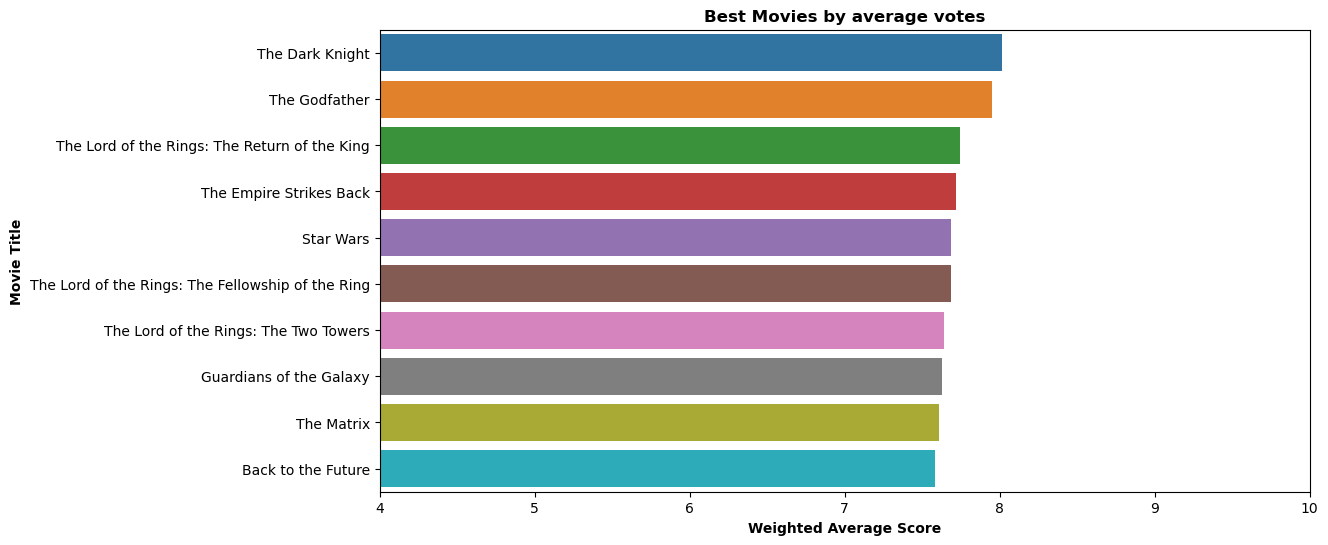

In [11]:
weight_avg=movie_sorted_ranking.sort_values('weighted_moving_avg',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_avg['weighted_moving_avg'].head(10), y=weight_avg['original_title'].head(10), data=weight_avg)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')